In [1]:
import pandas as pd
import numpy as np
#Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
#Hyper Parameter tunning
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.model_selection import RandomizedSearchCV
#Classification Algorithms
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E:\Machine Learning\data sets\heart_uci.csv") #read the data set
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,56,1,3,120,204,0,0,97,0,0.0,2,4,7,0
1,51,1,4,128,204,0,0,107,0,0.0,4,4,8,0
2,56,1,4,120,85,0,0,140,0,0.0,4,4,8,0
3,50,1,4,140,129,0,0,135,0,0.0,4,4,8,0
4,28,1,2,130,132,0,2,185,0,0.0,4,4,8,0


Data contains

    1.age - age in years
    2.sex - (1 = male; 0 = female)
    3.cp - chest pain type
    4.trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    5.chol - serum cholestoral in mg/dl
    6.fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    7.restecg - resting electrocardiographic results
    8.thalach - maximum heart rate achieved
    9.exang - exercise induced angina (1 = yes; 0 = no)
    10.oldpeak - ST depression induced by exercise relative to rest
    11.slope - the slope of the peak exercise ST segment
    12.ca - number of major vessels (0-3) colored by flourosopy
    13.thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
    14.target - have disease or not (1=yes, 0=no)

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000
mean,53.193139,0.767471,3.189327,133.005083,241.677255,0.160102,0.627700,139.353240,0.420584,0.877230,2.533672,2.720457,6.493011,0.510801
std,9.471307,0.422713,0.950954,17.421214,55.778483,0.366933,0.834922,24.898823,0.493967,1.054182,1.172120,1.722660,2.022995,0.500201
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-1.000000,1.000000,0.000000,3.000000,0.000000
25%,46.500000,1.000000,2.000000,120.000000,204.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,1.000000,6.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,230.000000,0.000000,0.000000,140.000000,0.000000,0.600000,2.000000,4.000000,7.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,272.000000,0.000000,1.000000,158.000000,1.000000,1.500000,4.000000,4.000000,8.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,4.000000,4.000000,8.000000,1.000000


In [4]:
df.isna().sum()  #NaN value values is Zero

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is zero null values

In [5]:
df.corr()   #corrrelation analysis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.047140,0.175896,0.247019,0.071429,0.237465,0.209409,-0.348804,0.252922,0.251283,-0.125962,-0.031231,-0.041231,0.304630
sex,0.047140,1.000000,0.147637,0.018992,-0.102688,0.084474,-0.014891,-0.167945,0.206962,0.107788,0.101844,0.176190,0.254738,0.303722
cp,0.175896,0.147637,1.000000,0.049015,0.076828,0.029697,0.061649,-0.343655,0.404460,0.243002,-0.120440,0.069627,0.088316,0.467778
trestbps,0.247019,0.018992,0.049015,1.000000,0.080298,0.155512,0.067744,-0.120996,0.160605,0.183747,-0.007734,0.075211,0.083752,0.161762
chol,0.071429,-0.102688,0.076828,0.080298,1.000000,0.059841,0.092132,0.003463,0.057850,0.066411,-0.067067,-0.041867,-0.022063,0.072492
fbs,0.237465,0.084474,0.029697,0.155512,0.059841,1.000000,0.132516,-0.046443,0.077257,0.057983,0.058445,0.058817,0.046072,0.129203
restecg,0.209409,-0.014891,0.061649,0.067744,0.092132,0.132516,1.000000,0.048930,0.050071,0.128574,-0.175031,-0.286517,-0.230153,0.102556
thalach,-0.348804,-0.167945,-0.343655,-0.120996,0.003463,-0.046443,0.048930,1.000000,-0.366801,-0.188841,-0.117196,-0.347498,-0.290573,-0.394620
exang,0.252922,0.206962,0.404460,0.160605,0.057850,0.077257,0.050071,-0.366801,1.000000,0.397457,-0.065143,0.168245,0.230205,0.483633
oldpeak,0.251283,0.107788,0.243002,0.183747,0.066411,0.057983,0.128574,-0.188841,0.397457,1.000000,-0.225469,-0.051163,0.086083,0.409288


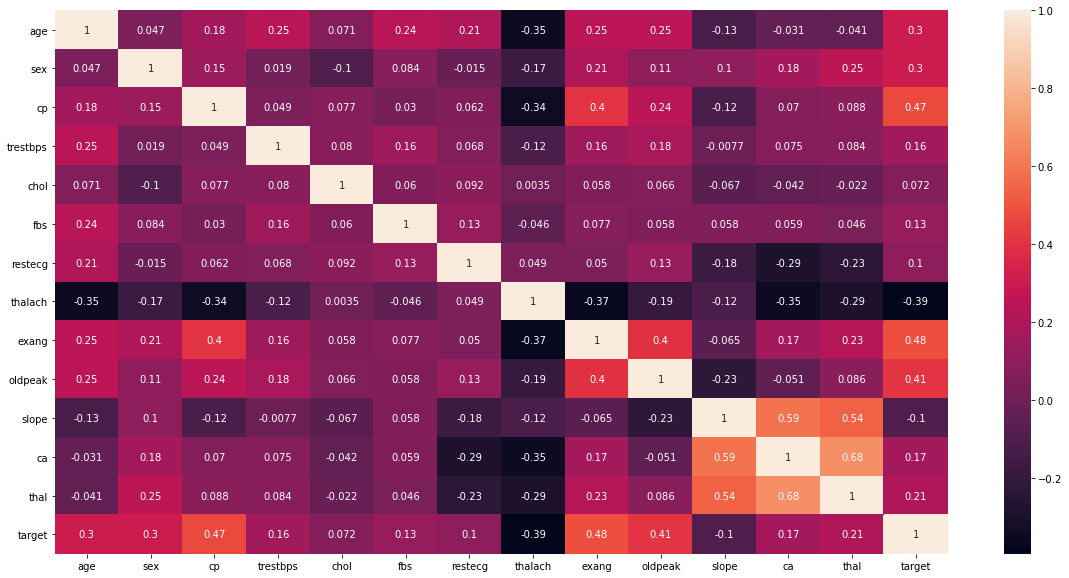

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)  #none of the features are not correlated

In [7]:
df.columns #columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Explore the data set

In [8]:
df["target"].value_counts()

1    402
0    385
Name: target, dtype: int64

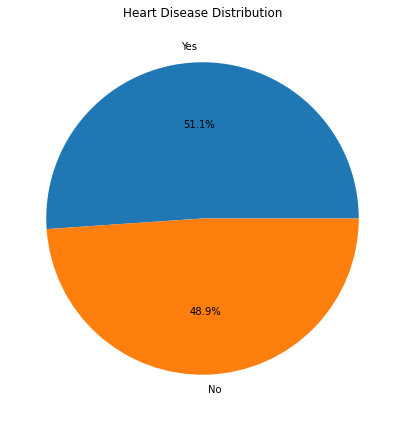

In [9]:
plt.figure(figsize=(7,8))  #Studying the Target series
slices =df["target"].value_counts()/df["target"].value_counts().sum()
plt.pie(slices,labels=["Yes","No"],autopct="%1.1f%%")
plt.title("Heart Disease Distribution")
plt.show()

Text(0.5, 1.0, 'Heart Disease Frequency Acctoding to Age')

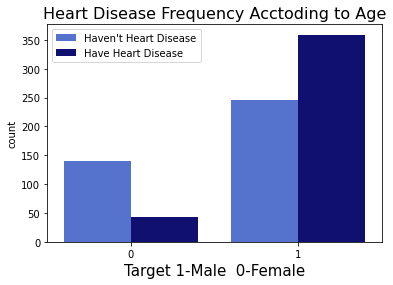

In [10]:
sns.countplot(x="sex", hue="target", data=df,palette=["royalblue", "navy"])
plt.legend(["Haven't Heart Disease","Have Heart Disease"])
plt.xlabel("Target 1-Male  0-Female",fontsize=15)
plt.title("Heart Disease Frequency Acctoding to Age",fontsize=16)

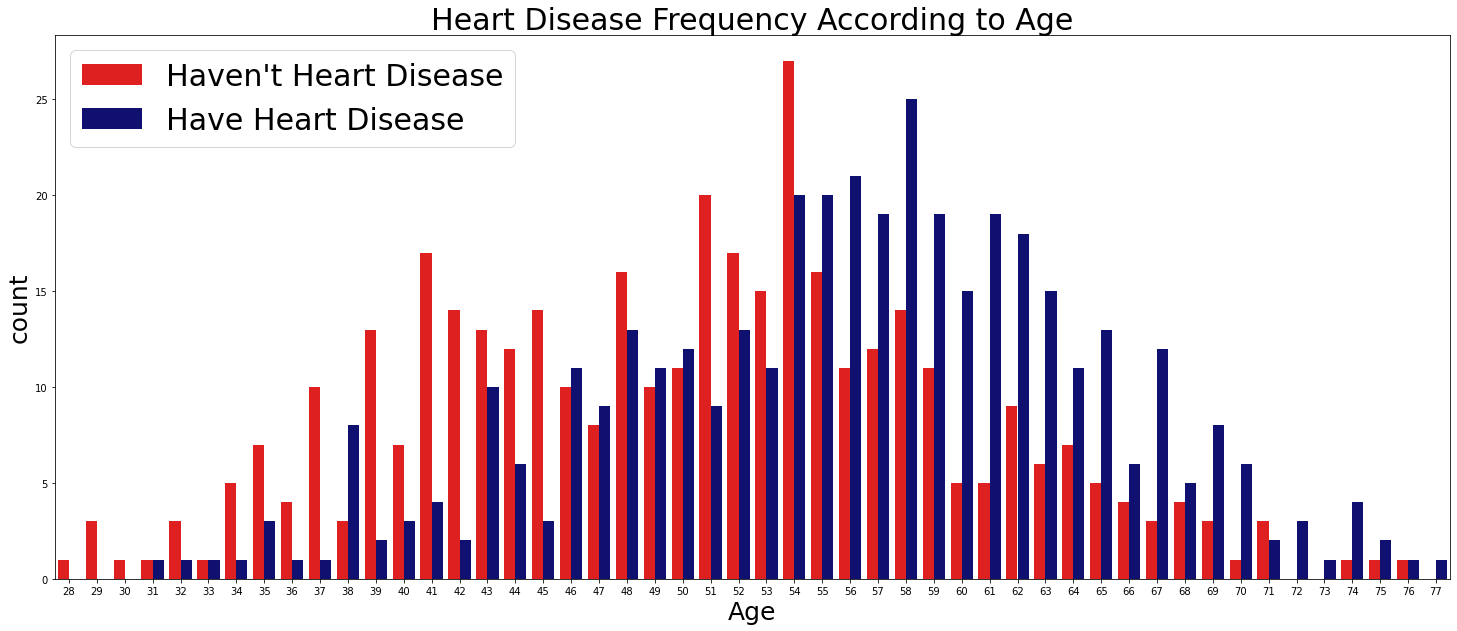

In [11]:
plt.figure(figsize=(25,10)) 
sns.countplot(x="age", hue="target", data=df,palette= ["red","navy"])
plt.legend(["Haven't Heart Disease","Have Heart Disease"],loc=2,fontsize=30)
plt.title("Heart Disease Frequency According to Age",fontsize=30)
plt.xlabel("Age",fontsize=25)
plt.ylabel("count",fontsize=25)
plt.show()

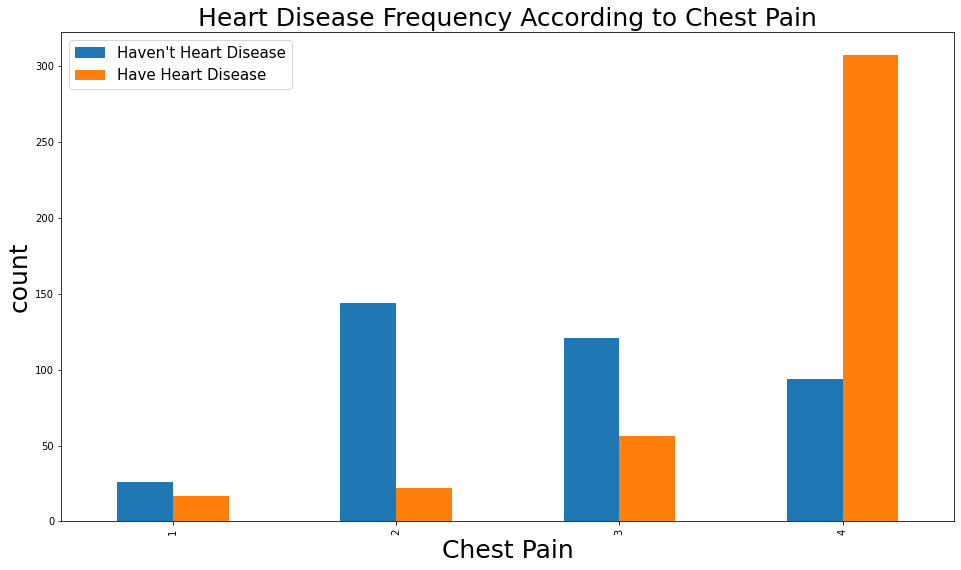

In [12]:
pd.crosstab(df["cp"],df["target"]).plot(kind="bar",figsize=(16,9))
plt.legend(["Haven't Heart Disease","Have Heart Disease"],fontsize=15)
plt.title("Heart Disease Frequency According to Chest Pain",fontsize=25)
plt.xlabel("Chest Pain",fontsize=25)
plt.ylabel("count",fontsize=25)
plt.show()

Text(0.5, 1.0, 'Heart Disease Frequency Acctoding to Fasting blood sugar')

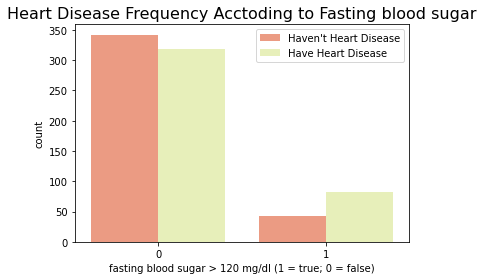

In [13]:
sns.countplot(df["fbs"],hue=df["target"],palette=["#fc9272","#edf8b1"])
plt.legend(["Haven't Heart Disease","Have Heart Disease"])
plt.xlabel("fasting blood sugar > 120 mg/dl (1 = true; 0 = false)")
plt.title("Heart Disease Frequency Acctoding to Fasting blood sugar",fontsize=16)

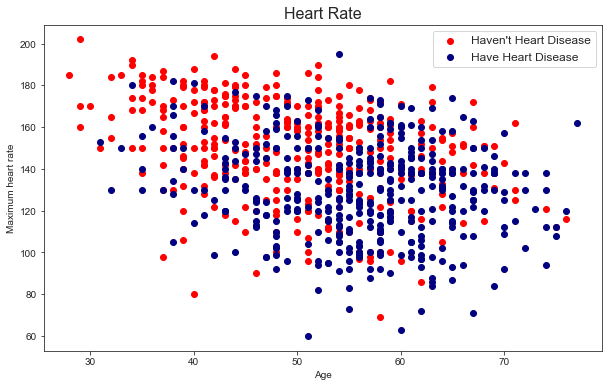

In [14]:
sns.set_style("ticks")
plt.figure(figsize=(10,6))
plt.scatter(df["age"][df["target"]==0],df["thalach"][df["target"]==0],color="red",label="Haven't Heart Disease")
plt.scatter(df["age"][df["target"]==1],df["thalach"][df["target"]==1],color="navy",label="Have Heart Disease")
plt.legend(fontsize=12)
plt.title("Heart Rate",fontsize=16)
plt.xlabel("Age")
plt.ylabel("Maximum heart rate")
plt.grid(False)
plt.show()

### Creating Dummy Variables

In [15]:
df["target"]

0      0
1      0
2      0
3      0
4      0
      ..
782    1
783    1
784    1
785    1
786    1
Name: target, Length: 787, dtype: int64

In [21]:
x = df.drop("target",axis=1) 
y= df["target"]

# Feature Selection

In [17]:
feature_selec_model = RandomForestClassifier(n_estimators=60, max_features='sqrt')
feature_selec_model.fit(x,y)
feature_imp = pd.DataFrame(feature_selec_model.feature_importances_,columns=["importance"])
feature_imp["features"]  = x.columns
feature_imp.set_index("features",inplace=True)
feature_imp.sort_values(by="importance",ascending=True,inplace=True)

<BarContainer object of 13 artists>

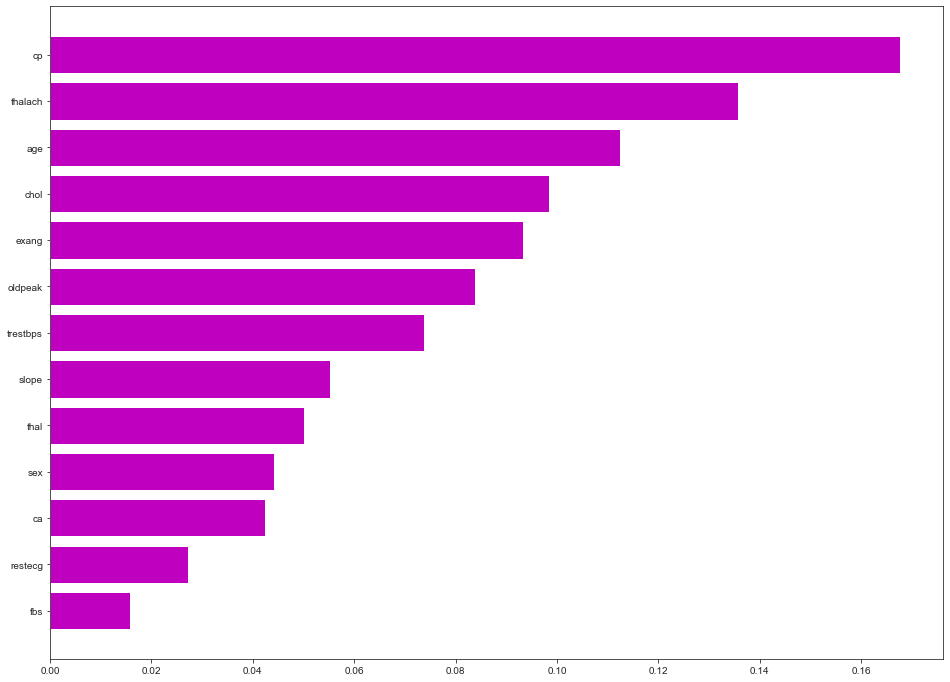

In [18]:
plt.figure(figsize=(16,12))
plt.barh(feature_imp.index,feature_imp["importance"],color="m")

In [19]:
top_Feature = feature_imp[5:].index
top_Feature

Index(['slope', 'trestbps', 'oldpeak', 'exang', 'chol', 'age', 'thalach',
       'cp'],
      dtype='object', name='features')

In [20]:
x = df[top_Feature]

## Split Data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#getting training set and testing set 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)   

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(629, 13)
(158, 13)
(629,)
(158,)


## Model Selection

In [27]:
def prediction(x_train,x_test,y_train,y_test,model,algo):        
        print(f"Predictions for {algo} Algorithem")
        print("Train Results: ")
        print("================")
        pre = model.predict(x_train)
        print("        Training Accuracy Score   : {:.2f} %".format((metrics.accuracy_score(y_train,pre))*100))
        print("")
        print("        Training F1 Score         : {:.4f} ".format((metrics.f1_score(y_train,pre,average="macro"))))
        print("")       
        print("        Training Precision        : {:.4f} ".format((metrics.precision_score(y_train,pre,average="macro"))))
        print("")
        print("        Training Recall           : {:.4f} ".format((metrics.recall_score(y_train,pre,average="macro"))))
        print()
        print(f"       Training Classification Report  :    ")
        print(f" {metrics.classification_report(y_train,pre)}")
        print("")
        print("")
        print("Test Results: ")
        print("================")
        pre_t = model.predict(x_test)
        print("        Testing Accuracy Score    : {:.2f} %".format((metrics.accuracy_score(y_test,pre_t))*100))
        print("")        
        print("        Testing F1 Score          : {:.4f} ".format((metrics.f1_score(y_test,pre_t,average="macro"))))
        print("")        
        print("        Testing Precision         : {:.4f} ".format((metrics.precision_score(y_test,pre_t,average="macro"))))
        print("")
        print("        Testing Recall            : {:.4f} ".format((metrics.recall_score(y_test,pre_t,average="macro"))))
        print()
        print(f"        Testing Classification Report  :  ")
        print(f" {metrics.classification_report(y_test,pre_t)}")        

In [28]:
colorm = ["YlOrRd","BuPu","PuBu","YlGn","RdBu"]
import random as ran
def con_mat(x_test,y_test,model,algo):
    print(f"Confusion matrix for {algo} Algorithem")
    pre_t = model.predict(x_test)
    cm_lr = metrics.confusion_matrix(y_test,pre_t)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm_lr,cmap=ran.choice(colorm),annot=True,cbar=True,annot_kws={"size": 20})

In [29]:
gbc = GradientBoostingClassifier(random_state=42)
algo = "Gradient Boosting Classifier"
g_model = gbc.fit(x_train,y_train)
prediction(x_train,x_test,y_train,y_test,g_model,algo)

Predictions for Gradient Boosting Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 94.59 %

        Training F1 Score         : 0.9458 

        Training Precision        : 0.9469 

        Training Recall           : 0.9455 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       307
           1       0.93      0.97      0.95       322

    accuracy                           0.95       629
   macro avg       0.95      0.95      0.95       629
weighted avg       0.95      0.95      0.95       629



Test Results: 
        Testing Accuracy Score    : 79.75 %

        Testing F1 Score          : 0.7973 

        Testing Precision         : 0.7991 

        Testing Recall            : 0.7979 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        78
           1       0.82  

Confusion matrix for Gradient Boosting Classifier Algorithem


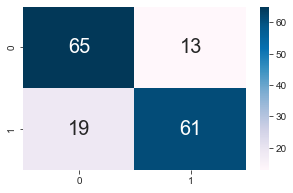

In [30]:
con_mat(x_test,y_test,g_model,algo)

In [31]:
import xgboost as xgb

In [32]:
model = xgb.XGBClassifier(n_estimators=100,objective='binary:logistic')

model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
algo = "XGBoost"
prediction(x_train,x_test,y_train,y_test,model,algo)

Predictions for XGBoost Algorithem
Train Results: 
        Training Accuracy Score   : 100.00 %

        Training F1 Score         : 1.0000 

        Training Precision        : 1.0000 

        Training Recall           : 1.0000 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       322

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629



Test Results: 
        Testing Accuracy Score    : 79.11 %

        Testing F1 Score          : 0.7911 

        Testing Precision         : 0.7915 

        Testing Recall            : 0.7913 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.78      0.81      0.79        78
           1       0.81      0.78      0.79  

Confusion matrix for XGBoost Algorithem


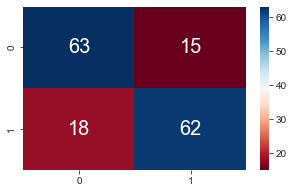

In [34]:
con_mat(x_test,y_test,model,algo)

Gradient Boost classifier gives the better accuracy compared to Xg boost classifier.

# Hyper Parameter Tunning

In [35]:
gbc = GradientBoostingClassifier(random_state=42)
parameters = {'n_estimators':[90,100,120,150,200],'min_samples_split':[2,3,4],
              'max_depth':[3,5,8,10],"max_features" : ['sqrt', 'log2'],
              'min_samples_leaf': [2,3,5,6]}
rs = RandomizedSearchCV(gbc,parameters,cv=5,n_jobs=-1)
rs.fit(x_train, y_train)
print ("r2 / variance : ", rs.best_score_)

r2 / variance :  0.823631746031746


In [36]:
algo = "Gradient Boosting Classifier"
prediction(x_train,x_test,y_train,y_test,rs,algo)

Predictions for Gradient Boosting Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 92.69 %

        Training F1 Score         : 0.9268 

        Training Precision        : 0.9273 

        Training Recall           : 0.9265 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       307
           1       0.92      0.94      0.93       322

    accuracy                           0.93       629
   macro avg       0.93      0.93      0.93       629
weighted avg       0.93      0.93      0.93       629



Test Results: 
        Testing Accuracy Score    : 81.01 %

        Testing F1 Score          : 0.8099 

        Testing Precision         : 0.8131 

        Testing Recall            : 0.8107 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        78
           1       0.85  

In [37]:
rs.best_params_

{'n_estimators': 120,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 3}

In [44]:
gbc = GradientBoostingClassifier(random_state=42)
parameters = {'n_estimators':[100,120,150,200,220,250],'min_samples_split':[1,2,3,4],
              'max_depth':[1,2,3,4],"max_features" : ["log2"],
              'min_samples_leaf': [4,5,6,7]}
grid = GridSearchCV(gbc,parameters,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)
print ("r2 / variance : ", grid.best_score_)

r2 / variance :  0.8331936507936508


In [45]:
algo = "Gradient Boosting Classifier"
prediction(x_train,x_test,y_train,y_test,grid,algo)

Predictions for Gradient Boosting Classifier Algorithem
Train Results: 
        Training Accuracy Score   : 90.78 %

        Training F1 Score         : 0.9077 

        Training Precision        : 0.9078 

        Training Recall           : 0.9077 

       Training Classification Report  :    
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       307
           1       0.91      0.91      0.91       322

    accuracy                           0.91       629
   macro avg       0.91      0.91      0.91       629
weighted avg       0.91      0.91      0.91       629



Test Results: 
        Testing Accuracy Score    : 83.54 %

        Testing F1 Score          : 0.8352 

        Testing Precision         : 0.8387 

        Testing Recall            : 0.8361 

        Testing Classification Report  :  
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        78
           1       0.88  

Confusion matrix for Gradient Boosting Classifier Algorithem


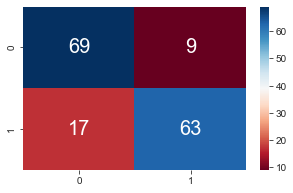

In [46]:
con_mat(x_test,y_test,grid,algo)

In [47]:
import pickle
pickle_out = open("heart_disease3.pkl","wb")
pickle.dump(grid, pickle_out)
pickle_out.close()